In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# use latex globally
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
data = None
with open('../data/diamond-old.json', 'r') as f:
    data = json.load(f)

data2 = None
with open('../data/mpi-time.json', 'r') as f:
    data2 = json.load(f)

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))
basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'FFTDF': 'g'}

print(basis)

['fftisdf-40', 'gdf', 'fftisdf-30', 'fftisdf-20', 'fftdf', 'fftisdf-10']
['gth-szv', 'gth-dzvp']


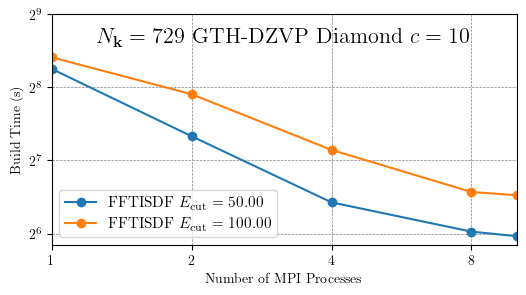

In [2]:
# use nproc as the x axis, and time as the y axis
basis = 'gth-dzvp'

kmesh = 729

# kecut = 100.0
method = 'fftisdf-10'

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
for kecut in [50.0, 100.0]:
    x = []
    y = []
    for p, d in data.items():
        if d['method'] != method:
            continue
        if d['ke_cutoff'] != kecut:
            continue
        if int(d['nkpt']) != kmesh:
            continue
        if d['basis'] != basis:
            continue
        nproc = 1
        time = d['time_build']
        x.append(nproc)
        y.append(time)

    for p, d in data2.items():
        if d['method'] != method:
            continue
        if d['ke_cutoff'] != kecut:
            continue
        if int(d['nkpt']) != kmesh:
            continue
        if d['basis'] != basis:
            continue
        nproc = int(p.split('/')[-1])
        time = d['time_build']
        x.append(nproc)
        y.append(time)

    ix = np.argsort(x)
    x = np.array(x)
    x = x[ix]

    y = np.array(y)
    y = y[ix]

    # Plot with proper formatting
    label = r'FFTISDF $E_{\mathrm{cut}} = %6.2f$' % kecut
    ax.semilogy(np.log2(x), y, 'o-', label=label, base=2)
    ax.set_xlim(np.log2(x[0]), np.log2(x[-1]))

    ax.grid(
        which='both',
        axis='both',
        linestyle='--',
        linewidth=0.5,
        color='gray'
    )

# Use 2^x as the x axis label
xx = [0, 1, 2, 3]
ax.set_xticks(xx)
ax.set_xticklabels([f'${2**x}$' for x in xx])

yy = [6, 7, 8, 9]
ax.set_yticks([2**y for y in yy])
ax.set_yticklabels([f'$2^{y}$' for y in yy])

ax.set_xlabel('Number of MPI Processes')
ax.set_ylabel('Build Time (s)')
ax.legend(
    # loc='upper left',
    # bbox_to_anchor=(0.0, 1.3),
    # ncol=2, frameon=False,
    fontsize=11
)
ax.text(0.5, 0.9, r'$N_\mathbf{k}=729$ GTH-DZVP Diamond $c = 10$', ha='center', va='center', transform=ax.transAxes, fontsize=16)
plt.show()

fig.savefig(figpath / 'time-mpi.png', bbox_inches='tight', dpi=300)
